In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import category_encoders as ce
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
sns.set(rc = {'figure.figsize':(21, 10)}) 
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

In [27]:
data = pd.read_csv(r"C:\Users\Damini Jain\ML-DT-Course-Files\Regression\archive\AB_NYC_2019.csv")

In [28]:
data.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


<AxesSubplot:xlabel='price', ylabel='Count'>

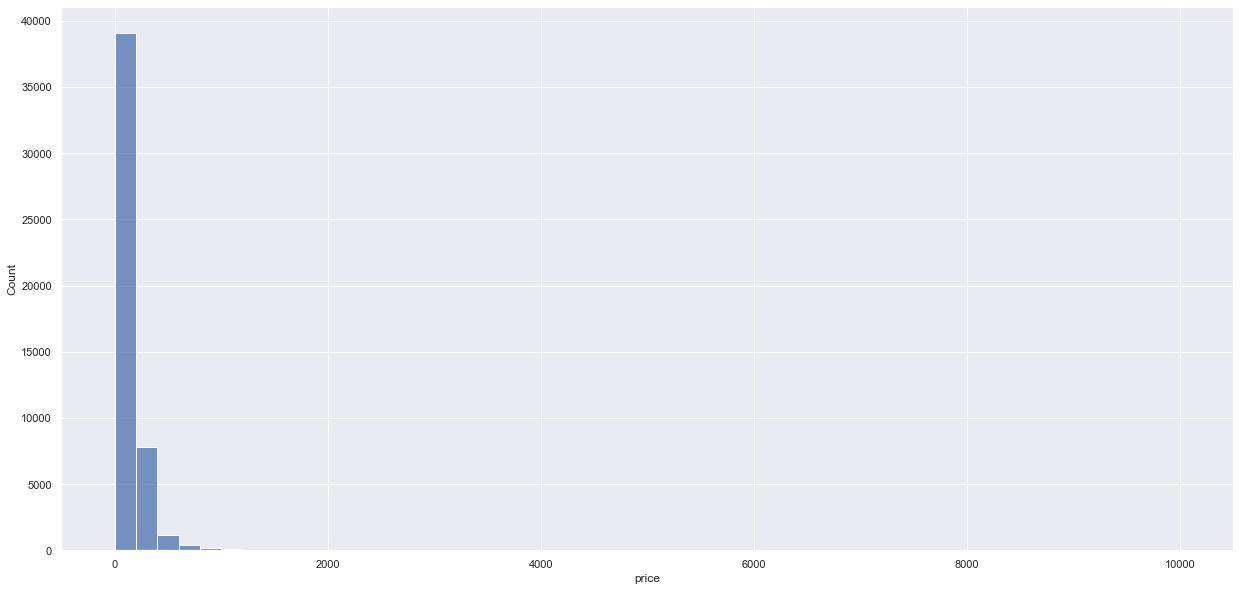

In [106]:
sns.histplot(data.price, bins = 50)

In [30]:
required_cols = [
    'latitude','longitude',
    'price','minimum_nights',
    'number_of_reviews','reviews_per_month',
    'calculated_host_listings_count', 'availability_365']

In [31]:
data_req = data[required_cols]

In [32]:
data_req.head(2)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355


In [33]:
(data_req.isnull().sum()/len(data_req))*100

latitude                           0.000000
longitude                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [107]:
data_req.reviews_per_month.isnull().sum()

10052

In [34]:
data_req.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,1.00000,5.00000,24.000000,629.00000
reviews_per_month,38843.0,1.373221,1.680442,0.01000,0.19000,0.72000,2.020000,58.50000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000


In [35]:
data_fillnazero = data_req.copy()
data_fillnamean = data_req.copy()

In [36]:
data_fillnazero["reviews_per_month"].fillna(0, inplace = True)

In [37]:
data_fillnamean["reviews_per_month"].fillna(data_fillnamean["reviews_per_month"].mean(), inplace = True)

In [22]:
### When fillna = 0 for missing column.

In [61]:
X = data_fillnazero.drop(columns = "price")
y = data_fillnazero.price
y = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size = 0.2, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, shuffle = True, test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
round(mean_squared_error(y_valid, y_pred, squared = False), 2)


0.64

In [62]:
X = data_fillnamean.drop(columns = "price")
y = data_fillnamean.price
y = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size = 0.2, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, shuffle = True, test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
round(mean_squared_error(y_valid, y_pred, squared = False), 2)


0.64

In [51]:
def train_linear_regression_regularized(X, Y, r):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack((ones, X))
    
    XTX = np.dot(X.T, X)
    
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inverse = np.linalg.inv(XTX)
    w = np.dot(np.dot(XTX_inverse, X.T), Y)
    
    return w[0], w[1:]

In [59]:
def rmse(y, y_pred):
    se = (y - y_pred)**2
    mse = se.mean()

    return np.sqrt(mse)

In [63]:
r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

for i in r:
    w0, w = train_linear_regression_regularized(X_train, y_train, i)
    y_predicted_reg = w0 + X_valid.values.dot(w)
    RMSE_value = rmse(y_predicted_reg, y_valid).round(2)
    print(i,RMSE_value)

r: 0, RMSE: 0.64
r: 1e-06, RMSE: 0.64
r: 0.0001, RMSE: 0.64
r: 0.001, RMSE: 0.65
r: 0.01, RMSE: 0.66
r: 0.1, RMSE: 0.68
r: 1, RMSE: 0.68
r: 5, RMSE: 0.68
r: 10, RMSE: 0.68


In [93]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [94]:
seed_values_rmse = []

In [100]:
X = data_fillnazero.drop(columns = "price")
y = data_fillnazero.price
y = np.log1p(y)

for i in seed_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size = 0.2, random_state = i)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, shuffle = True, test_size = 0.2, random_state = i)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    seed_values_rmse.append(round(mean_squared_error(y_valid, y_pred, squared = False), 2))


In [102]:
np.std(seed_values_rmse).round(3)

0.005

In [105]:
X = data_fillnazero.drop(columns = "price")
y = data_fillnazero.price
y = np.log1p(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size = 0.2, random_state = 9)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, shuffle = True, test_size = 0.2, random_state = 9)
model = Ridge(alpha = 0.001)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
round(mean_squared_error(y_test, y_pred, squared = False), 2)

0.65